# Beta Estimation

## Author Notes
- Beta measures how much does the asset move when the benchmark moves 1%
- β = Cov(asset, benchmark) / Var(benchmark)
- Covariance = how much do they move together
- Variance = how much does the benchmark move on its own

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Step 0 - Generate data
np.random.seed(42)
n = 252
benchmark_returns = np.random.normal(0.0003, 0.01, n)
asset_returns = 0.0001 + 1.2 * benchmark_returns + np.random.normal(0, 0.005, n)

In [7]:
def calculate_beta(asset_returns, benchmark_returns):
    # 1. Calculate mean of asset returns
    X_i = np.mean(asset_returns)
    
    # 2. Calculate mean of benchmark returns
    Y_i = np.mean(benchmark_returns)
    
    # 3. Calculate covariance between asset and benchmark
    # Formula Cov(X,Y) = (1/n) × Σ[(X_i - mean_X) × (Y_i - mean_Y)]
    cov = (1/252) * np.sum((asset_returns - X_i) * (benchmark_returns - Y_i))
    
    # 4. Calculate variance of benchmark
    var_benchmark = (1/252) * np.sum((benchmark_returns - Y_i)**2)
    
    # 5. Calculate beta = covariance / variance
    beta = cov / var_benchmark
    alpha = X_i - beta * Y_i
    
    # 6. Return beta
    return beta, alpha

# Call function
beta, alpha = calculate_beta(asset_returns, benchmark_returns)
print(f"Estimated Beta: {beta:.4f}")
print(f"Estimated Alpha: {beta:.6f}")

Estimated Beta: 1.2115
Estimated Alpha: 1.211484


In [8]:
# Verify with NumPy
np_cov = np.cov(asset_returns, benchmark_returns)[0,1]
np_var = np.var(benchmark_returns)
np_beta = np_cov / np_var

print(f"Your beta:  {beta:.4f}")
print(f"NumPy beta: {np_beta:.4f}")
print(f"Difference: {abs(beta - np_beta):.6f}")

Your beta:  1.2115
NumPy beta: 1.2163
Difference: 0.004827


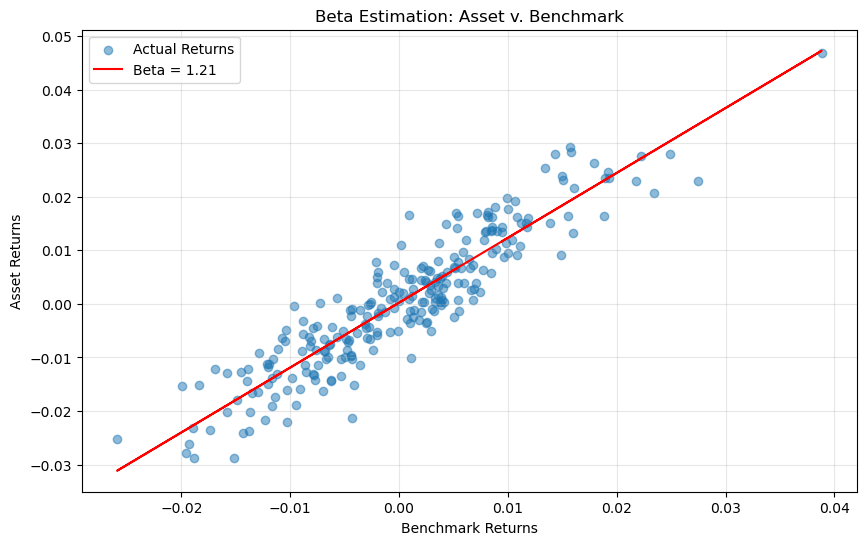

In [9]:
# Create the plot
plt.figure(figsize=(10, 6))

# Step 1: Create scatter plot of returns
# plt.scatter(x_data, y_data, ...) 
plt.scatter(benchmark_returns, asset_returns, alpha=0.5, label="Actual Returns")

# Step 2: Create the regression line
# You need two points to draw a line
# Hint: You'll need to calculate alpha first!
# alpha = mean(asset) - beta * mean(benchmark)

# Line equation: asset_predicted = alpha + beta * benchmark
predicted_returns = alpha + beta * benchmark_returns
plt.plot(benchmark_returns, predicted_returns, color='red', label=f"Beta = {beta:.2f}")

# Step 3: Add labels and title
# plt.xlabel(...)
plt.xlabel("Benchmark Returns")
# plt.ylabel(...)
plt.ylabel("Asset Returns")
# plt.title(...)
plt.title("Beta Estimation: Asset v. Benchmark")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()